In [52]:
# 카메라 스티커 앱 만들기

# 동영상 처리, 검출, 키포인트 추정, 카메라 원근 기술 필요

# 목표 
# 1. 얼굴인식 카메라의 흐름을 이해
# 2. dlib 라이브러리 사용
# 3. 이미지 배열의 인덱싱 예외 처리

# 사진에서 눈, 코, 입의 위치를 찾는 기술 : 랜드마크 landmark 또는 조정 alignment, 
# 큰 범위로는 keypoint detection 이라고 함.
# 대부분의 face landmark 데이터셋은 눈, 코, 입, 턱을 포함하고 있다.


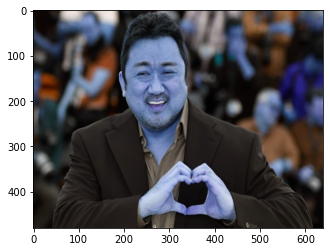

In [53]:
# 과정
# 1. 사진준비하기
# camera_sticker 디렉토리 생성
# camera_sticker 하위 디렉토리로 images / models 디렉토리 생성
# image 디렉토리에 사진 및 사용할 스티커 넣기.

# 패키지 설치 (opencv, cmake, dlib)
# pip install opencv-python
# pipinstall cmake
# pip install dlib

# 사용할 패키지 가져오기

import cv2
import matplotlib.pyplot as plt
import numpy as np
# print("🌫🛸")



# 준비한 이미기 가져오기
import os

# my_image_path 변수에 준비한 사진의 경로 입력
my_img_path = os.getenv('HOME') + '/camera_sticker/images/image2.jpg'

# opencv 로 이미지 읽어오기
img_bgr = cv2.imread(my_img_path)

# 640 x 360 크기로 resizze (16 : 9 비율), 원본 이미지가 4:3 비율이라면 640 x 480 으로 변경
img_bgr = cv2.resize(img_bgr, (640, 480))

# 출력용 이미지 별도 보관
img_show = img_bgr.copy()

# 이미지 출력해보기
plt.imshow(img_bgr)
plt.show()

# opencv 는 RGB 대신 BGR(파, 녹 빨) 을 사용하기대문에 이미지가 푸르게 보임

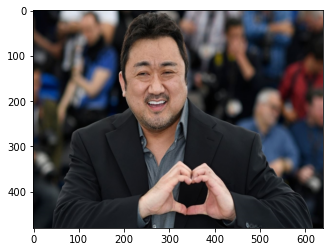

In [54]:
# RGB 로 이미지 보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 보정처리한 이미지 출력
plt.imshow(img_rgb)
plt.show()

rectangles[[(201, 98) (356, 253)]]


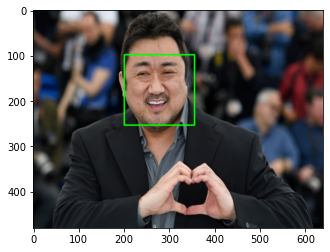

In [55]:
# 얼굴 검출 (faace detection)

# object dection 기술을 이용하여 열굴 위치찾기

# 얼굴 인식을 위한 hog dector 을 사용하기위해, dlib 패키지 가져오기
import dlib

# detector_hog 변수에 얼굴 인식 기능 저장
detector_hog = dlib.get_frontal_face_detector()

#print("🌫🛸")

# 위에서 저장한 얼굴 이미지를 detector 를 통해 bounding box 추출
# dectector_hog 의 2번째 파라미터, 1 은 이미지 피라미드의 수를 의미
# 이미지 피라미드 : upsampling 방법을 통해 크기를 키우는 것
# 이미지 피라미드에서 얼굴을 검출하면 작게 촬영된 얼굴을 확대할 수 있어 정확한 검출 가능

# dlib_rects 변수에 detector_hog 에서 찾는 이미지 좌표를 저장
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)


# 이미지 피라미드 과정을 거쳐, detector_hog 를 통해 찾은 얼굴 출력 (녹색 테두리로 감지된 얼굴 출력)
for dlib_rect in dlib_rects :
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # dlib detector 은 dlib.rectangles타입의 객체를 반환.
    # dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 구성
    # dlib.revtangle 에는 left(), top(), right(), bottom(), height(), width() 등을 포함
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb= cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [56]:
# 얼굴 랜드마크 (face landmark)
# face landmark localization : 얼굴의 눈, 코, 입 의 위치를 추론하는 것

# object keypoint estimation 알고리즘
# 객체 내부의 점을 찾는 기술.

# object keypoint estimation 의 2가지 방법
# top-down : bounding box 를 찾고, box 내부의 keypoint 를 예측
# bottom-up : 전체 이미지의 keypoint 를 찾고, point 관계를 이용해 군집화, box 생성


# dlib landmakr localization : bounding box 에서 눈, 코, 입 찾기
# dlib ibug 를 통해 landmark localization 수행
# dlib 에서 제공되는 모델에서 weight file  다운 (아래 코드 사용)
# $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# 맨 처음 생성한 camera_sticker 디렉토리의 models 디렉토리로 옮겨주기


# 저장한 landmark 모델 불러오기
# 저장한 landmark 모델 경로 저장
model_path = os.getenv("HOME") + '/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# landmark_predictor 변수에 해당 모델 저장
landmark_predictor = dlib.shape_predictor(model_path)

# list_landmarks 빈리시트 생성
list_landmarks = []

# detector_hog 를 통해 찾은 이미지 좌표를 가지고 landmark 모델을 통해 img_rgb 파일의 포인트들을 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # 찾은 포인트들을 리스트 형태로 저장
    # points 는  dlib.full_object_detection 의 객체이므로, part() 함수로 개별 위치에 접근 가능
    # 보다 직관적인 (x, y) 형태로 변환, list_points 는 튜플(x, y) 형태로 리스트에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    
    # 저장된 리스트를 위에서 만들어준 빈 리시트에 추가
    list_landmarks.append(list_points)

# 총 랜드마크 포인트의 수는 68개
print(len(list_landmarks[0]))

68


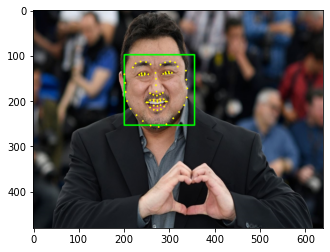

In [57]:
# 찾은 랜드마크를 영상에 출력
for landmark in list_landmarks : 
    for idx, point in enumerate(list_points) : 
        # cv2.circle(이미지, 중심좌표를 어떤 모양으로 할 것인지, 중심좌표 모양의 반지름, 좌표 색상, 굵기)
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [58]:
# 스티커 적용하기

# 눈썹 위 얼굴 중앙 위치에 스티커 씌우기
# 코를 기준으로 높이 x 이상에 위치 / n 픽셀 위에 스티커를 위치 등 여러가지 방법으로 씌울 수 있다.

# 카메라 거리에 따라 픽셀 x 가 달라 비율로 계산해야함.
# 1. 스티커 위치 계산 : x = x nose, y = y nose - width/2
# 2. 스티커 크기 계산 : width = height = width bbox


# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks) : 
    # 코 중심위치 확인
    print(landmark[30])
    
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print('(x, y) : (%d, %d)' %(x, y))
    print('(w, h) : (%d, %d)' %(w, h))

(272, 179)
(x, y) : (272, 101)
(w, h) : (156, 156)


In [59]:
# 스티커 이미지 적용

# 스티커 이미지 불러오기
sticker_path = os.getenv("HOME") + '/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

(156, 156, 3)


In [60]:
# 스티커 이미지를 씌위기위해 (x, y) 좌표 조정

# left 좌표 조정
refined_x = x - w // 2

# top 좌표 조정
refined_y = y - h

print('(x, y) : (%d, %d)' %(refined_x, refined_y))

# 조정된 좌표 중 y 값이 음수인 이유 : opeencv 데이터는 numpy ndarray 형태 데이터 사용
# ndarray 데이터는 음수 인덱스에 접근할 수 없어 예외처리가 필요

# 원본 이미지 범위를 벗어난 스티커 부분을 제거
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

# -y 크기만큼 스티커를 자르기
refined_y = 0
print('(x, y) :(%d, %d)' %(refined_x, refined_y))

(x, y) : (194, -55)
(101, 156, 3)
(x, y) :(194, 0)


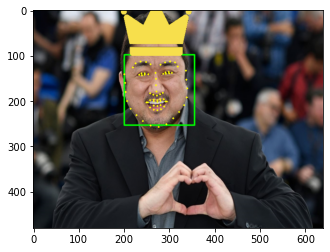

In [61]:
# 원본 이미지에 스티커 적용
# sticker_area : 원본이미지에서 스티커를 적용할 위치를 크롭한 이미지
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0,sticker_area,img_sticker).astype(np.uint8)

# 스티커 적용한 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

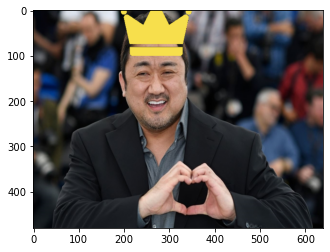

In [62]:
# 최종 결과
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 회고

1. 스티커 사진 위치를 옮기는 과정에서 정말 많은 애를 먹었다...
2. 이해가 안갔는데 모든 좌표를 하나씩 건들여보며 시도해본 결과 위치를 조정하는데 성공했지만, 
   sticker_area 부분에서 왜 x 와 값을 스티커 쉐입에 더해줘야하는지 잘 모르겠다.
3. 그리고 다른 사진으진, 다른 각도로 해 보았을때 얼굴을 감지하지 못했다.
   턱받침을 하고 있는 사진이었는데 손 위치 때문에 얼굴 윤곽을 정확히 감지하지 못했나 싶다.
4. 그리고 너무 어렵다 ....